<br>
<br>

# Pass Reception and Transition: Identifying Ball-Progressing Midfielders

---

<br>

**One of the key skills of a midfielder is the ability to drop back into her defensive half to receive passes and subsequently transition the play to her attacking third via ball-progressing [sequences](https://www.statsperform.com/resource/introducing-a-possessions-framework/). Transitions like these can increase a team's chances of scoring more goals and winning games. Therefore, it's essential for teams to have midfielders who can execute these transitions effectively.** 

**Here's an [example clip](https://youtu.be/K6AZekdTNcI?si=5EFkmfsL18A4E1Mx&t=5284):**

> Observe how at 58:37, So-Yun Ji (# 10) positions herself to receive the pass from Magdalena Eriksson. She checks her shoulder to gauge incoming pressure and evaluate her possible options. Ji then passes the ball to the left wing, where Hannah Blundell (# 3) is open, knowing that Hannah can either carry or pass the ball into the attacking third. Hannah finally passes the ball to Sam Kerr (# 20), who receives it in the attacking third to complete the transition.

**The objective of this analysis is to identify such ball-progressing midfielders from the FA Women’s Super League (WSL) 2020-21 season and analyze them. This analysis uses event data provided by [StatsBomb](https://statsbomb.com/news/statsbomb-release-free-2020-21-fa-womens-super-league-data-updated-r-guide/) and 'minutes played' data provided by [FBref](https://fbref.com/en/comps/189/2020-2021/playingtime/2020-2021-Womens-Super-League-Stats).**

<br>

We will use the 'minutes played' data by FBref to create ['per 90' metrics](https://statsbomb.com/articles/soccer/an-introduction-to-the-per-90-metric/), which will tell us how receptions and transitions a player can make in 90 minutes (the standard duration of a football match). 

<br>

Before delving into the analysis, here are the rules and conditions that are used to define and analyze *pass receptions* and *transitions* in this analysis:

- We are going to use a pitch configuration where the pitch is divided into 18 zones, with 6 zones in each third of the pitch. For reference, here's an image of the same pitch configuration by [The Coaches' Voice](https://www.coachesvoice.com/):

    <img src="images/pitch_zones.jpg" alt="Football Pitch - 18-Zone Configuration" width="500" height="auto">

<br>

- For a *pass reception* to be considered in this analysis, it must satisfy the following conditions:
    - The pass should be successfully received by a midfielder in **zones 4-9**.
    - The pass must have started in **zones 1-9**, i.e., the defensive half.

<br>

- A *transition* following a pass reception is considered successful if it satisfies the following conditions:
    - The transition events must belong to the same [possession](https://www.statsperform.com/resource/introducing-a-possessions-framework/) as the pass reception event.
    - The transition must end in the final/attacking third, i.e., **zones 13-18**.
    - The transition can involve **2 players at max** (the first of which is the player who receives the pass). The idea behind this is:<br>
    > A midfielder, after receiving the pass in her own defensive half, will want to move the ball into her attacking half. She can either carry the ball, or pass the ball, or do both to make the ball reach their attacking third - all on her own. Another option for her is to pass the ball to one of her teammates who is open and has the space and time to move the ball into the attacking third.
    >
    > In the second case, the first player saw an opportunity for progressing the ball through the second player and hence made the decision to pass the ball. Therefore, I want to give some credit to the first player because she made a decision depending on which of her teammates is open and has a higher probability of moving the ball forward. But if we add a third player, then the first player might not play a big role in the third player's decision making - the uncertainty will increase here. In other words, the first player is more certain of the second player's available choices and possible outcomes than she is for the third player.

    - The transition can have a **maximum of 4 events**. Here's the reason why:<br>
    > There are 2 major events in any transition - a pass and a carry. Based on numerous sample clips I watched, the most common transitions (into the attacking third) involving 2 players can be completed in 4 events or less - for example, player #1 carries (event count = 1) and passes (event count = 2) the ball to player #2 who then carries (event count = 3) and passes (event count = 4) the ball into the attacking third. Other examples might involve less number of events. 
    - Solo transitions are defined as successful transitions where the number of players involved is one.

<br>

- Events are processed and counted using the following rules:
    - A successful pass of any length is counted as an event and the final location of the pass is recorded (to check if the ball has reached the attacking third).
    - A successful carry is counted as an event only when the carry distance is **5 metres or more** (or, 5.47 yards or more - since StatsBomb coordinate data is in yards). The carry end location is also recorded (to check if the ball has reached the attacking third). 
    - If a successful carry's length is less than 5 metres then it is not counted as an event but its end location is recorded.
    - Events like dispossession, miscontrol, block, interception, clearance, unsuccessful pass, unsuccessful dribble, shot, foul will break the transition.
    - If there's a successful dribble between two successful carries, then both the carries will be combined for 'event count' and 'ball location' calculation.
    - All other events like duels and ball recoveries are ignored since those are covered by one of the above events/rules related to them.

<br>

- StatsBomb's pitch configuration is 120 yards long, i.e. the x-coordinate is from 0-120. Here are the x-coordinates for different areas of the pitch discussed above:
    - The Pass Reception Area (Zones 4-9): **20 < x < 60**
    - The Pass Start Area (Defensive Half / Zones 1-9): **x < 60**
    - The Attacking/Final Third (Zones 13-18): **x >= 80**

<br>

- To simplify the analysis, we are going to consider all types of midfielders in this analysis instead of conducting separate analyses for different types or omitting a particular type (say, attacking midfielders).

- We are not going to analyze any pressure related data in this analysis - since in the defensive half, sometimes a midfielder will move from a crowded area to an open area to make passing and receiving easier, and sometimes she will move to high pressure areas to receive the pass and relieve the pressure. I don't want to differentiate between these two situations in this analysis. My primary focus in this analysis is on the events following a pass reception, but pressure data can definitely be used for further analysis.

- As a final step of data preparation, we will retain only those midfielders for our analysis who had played for **at least 450 minutes** (equivalent to 5 full matches) during the 2020-21 season.

<br>

Hereafter, all mentions of *pass receptions* and *successful/unsuccessful transitions* will refer to the above definitions.

With the conditions and rules defined, let's dive into the code and analyze our findings!

<br>
<br>

---

**NOTE:** 

- These parameters can be tweaked based on your specific requirements. For instance, you might want to set the event count limit to 3 instead of 4, or you might want to include zones 1-3 or 10-12 in the pass reception area, or you may want to exclude attacking midfielders from the analysis.
>
- In many places, I've used median instead of mean because most of the data I've used is not symmetrically distributed (e.g., x-coordinates of pass reception events), and for skewed data, the median is a better measure of central tendency than the mean since it is less affected by the outliers.
>
- I'm using [pandasql](https://www.datacamp.com/tutorial/how-to-use-sql-in-pandas-using-pandasql-queries) (helps write SQL queries on *pandas* dataframes) later in the analysis since creating aggregated views is much easier in SQL. But the [downside](https://towardsdatascience.com/the-downsides-of-pandasql-that-no-one-talks-about-9b63c664bef4) of using *pandasql* is that its run-time is much higher than that of *pandas*. I'm still using *pandasql* here since this is a one-off analysis with a small amount of fixed data. If I were to make an app based on this idea or if I were to run weekly reports on this using updated data, I would have invested my time to write the aggregations using *pandas* to improve my code's efficiency.

---

<br>
<br>

In [1]:
# IMPORTING LIBRARIES AND PACKAGES

from statsbombpy import sb
import math
import pandas as pd
from pandasql import sqldf # for running SQL on dataframes
import requests
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

<br>

In [2]:
# READING IN STATSBOMB EVENT DATA 

columns = [
    'id',
    'match_id',
    'index',
    'minute',
    'second',
    'possession',
    'possession_team_id',
    'possession_team',
    'type',
    'player_id',
    'player',
    'position',
    'team_id',
    'team',
    'location',
    'pass_end_location',
    'pass_outcome',
    'ball_receipt_outcome',
    'pass_recipient_id',
    'pass_recipient',
    'carry_end_location',
    'dribble_outcome',
    'foul_won_advantage',
    'related_events',
    'under_pressure'
]

events = sb.competition_events(
    country='England',
    division= "FA Women's Super League",
    season='2020/2021',
    gender='female'
)[columns]

events.head() # dataframe containing the entire season's event data

/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data acce

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,pass_end_location,pass_outcome,ball_receipt_outcome,pass_recipient_id,pass_recipient,carry_end_location,dribble_outcome,foul_won_advantage,related_events,under_pressure
0,f51b1630-d1a8-4837-97b0-de862f0e299a,3775648,1,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1bbead8d-7790-4898-a765-3cdffeaf966e,3775648,2,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,caa9cf6d-dd46-4bdc-ba4c-f6fc82cb9fa9,3775609,1,0,0,1,968,Arsenal WFC,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f85b9236-3d19-476a-8304-57b74b6416b3,3775609,2,0,0,1,968,Arsenal WFC,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b7f68694-0261-4929-ad96-907e62ec630c,3775633,1,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

In [3]:
# READING IN STATSBOMB MATCH DATA

matches = sb.matches(competition_id=37, season_id=90)[
    [
        'match_id', 'competition', 'season', 
        'match_date', 'home_team', 'home_score', 
        'away_score', 'away_team'
    ]
]

matches

/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,competition,season,match_date,home_team,home_score,away_score,away_team
0,3775648,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
1,3775609,England - FA Women's Super League,2020/2021,2021-04-28,Arsenal WFC,2,0,West Ham United LFC
2,3775633,England - FA Women's Super League,2020/2021,2021-02-06,Aston Villa,1,0,Tottenham Hotspur Women
3,3775570,England - FA Women's Super League,2020/2021,2021-03-28,Brighton & Hove Albion WFC,0,5,Everton LFC
4,3775581,England - FA Women's Super League,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa
...,...,...,...,...,...,...,...,...
126,3775608,England - FA Women's Super League,2020/2021,2021-01-17,West Ham United LFC,0,1,Tottenham Hotspur Women
127,3775599,England - FA Women's Super League,2020/2021,2021-04-20,West Ham United LFC,0,0,Aston Villa
128,3775554,England - FA Women's Super League,2020/2021,2020-11-14,Everton LFC,1,1,Reading WFC
129,3775652,England - FA Women's Super League,2020/2021,2021-02-07,Chelsea FCW,1,2,Brighton & Hove Albion WFC


<br>

In [4]:
# function to find if the pass started in the defensive half for a given pass reception event
def pass_start_location(x):
    return events[
        events.id == list(filter(lambda x: events[events.id == x].type.item() == 'Pass', x))[0]
    ].location.item()[0] < 60

<br>

In [5]:
ball_receipts = events[
    (events.type == 'Ball Receipt*') \
    & (events.ball_receipt_outcome.isna()) \
    & (events.position.str.contains('Midfield'))
] # selecting event data for successful pass receptions by midfielders

ball_receipts = ball_receipts[
    ball_receipts.location.apply(lambda x: 20 < x[0] < 60)
] # checking if pass reception happened in zones 4-9

ball_receipts = ball_receipts[
    ball_receipts.related_events.apply(pass_start_location)
] # checking if the associated pass started in the defensive half


ball_receipts = pd.merge(
    left=ball_receipts, 
    right=matches, 
    how='left', 
    on='match_id'
) # joining pass reception and match data (to have match details for video verification)

'''
dataframe containing pass reception event data (based on our definition 
of pass reception events discussed in the beginning of the analysis)
'''
ball_receipts.head() 

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,foul_won_advantage,related_events,under_pressure,competition,season,match_date,home_team,home_score,away_score,away_team
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,3775648,9,0,1,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,NaN,[4467e274-205f-41be-ab7e-62ece2697dbc],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,3775648,15,0,6,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,NaN,[51af8ad7-5652-4717-9547-796fd8212fcf],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,3775648,46,0,31,3,2647,Aston Villa,Ball Receipt*,46539.0,...,NaN,[5cd79af7-7929-4b2b-a3a7-9d9f839db461],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
3,be59c93a-1476-4512-b90f-b02435b31ba0,3775648,57,0,40,4,968,Arsenal WFC,Ball Receipt*,10650.0,...,NaN,[6ebcfd9e-39ed-490b-a120-c8a92c1a1c44],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,NaN,[9674c1be-0675-499b-9328-82ec1f5fcc39],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC


<br>

In [6]:
data = dict()

'''
For every pass reception event (outer for loop), we will now check if the 
subsequent events (inner for loop) in the same possession lead to a 
successful transition or not (based on the definition of transitions 
discussed in the beginning of this analysis).
'''
# outer for loop
for receipt in ball_receipts.itertuples():
    event_dict = dict()
    event_count = 0 # to count number of events
    final_location_x = receipt.location[0] # to track the ball's latest location
    players = set() # to keep a record of unique players involved
    dribble = False
    last_carry_start_location = receipt.location
    last_carry_distance = 0

    # dataframe with events following the pass reception in the same possession
    possession_events = events[
        (events.match_id == receipt.match_id) \
        & (events.possession == receipt.possession) \
        & (events['index'] > receipt.index)
    ].sort_values('index') 

    # inner for loop
    for event in possession_events.itertuples():

        # break the inner loop and move to the next pass reception event 
        # if attacking third is reached or event limit is reached
        if final_location_x >= 80 or event_count == 4:
            break
        
        else:
            # for a successful pass
            if event.type == 'Pass' and pd.isna(event.pass_outcome):
                players.add(event.player_id)

                # break the inner loop and move to the next pass reception event
                # if a third player gets involved in the transition
                if len(players) == 3:
                    break 
                
                event_count += 1
                final_location_x = event.pass_end_location[0]

            # for a carry which doesn't follow a successful dribble: 
            elif dribble == False and event.type == 'Carry':
                players.add(event.player_id)
                if len(players) == 3:
                    break
                if math.dist(event.location, event.carry_end_location) >= 5.47:
                    event_count += 1
                final_location_x = event.carry_end_location[0]

                # the following 2 variables will help combine 2 carries sandwiching a successful dribble
                last_carry_start_location = event.location
                last_carry_distance = math.dist(event.location, event.carry_end_location)

            # for defensive actions, stoppages in play or shots which break the transition
            elif event.type in ['Dispossessed', 'Miscontrol', 'Interception', 'Clearance', 'Block', 'Shot'] \
            or (event.type == 'Pass' and pd.notna(event.pass_outcome)) \
            or (event.type == 'Dribble' and event.dribble_outcome == 'Incomplete') \
            or (event.type == 'Foul Won' and pd.isna(event.foul_won_advantage)):
                break

            # for a successful dribble
            elif event.type == 'Dribble' and event.dribble_outcome == 'Complete':
                dribble = True

            # for a carry following a successful dribble:
            elif dribble == True and event.type == 'Carry':

                # both the carries are combined and considered to be a single carry
                final_location_x = event.carry_end_location[0]
                dribble = False
                last_carry_distance = math.dist(last_carry_start_location, event.carry_end_location)

                # if the carry before the dribble was less than 5 metres long
                # and if both the carries combined are 5 metres or longer in length, 
                # then the event_count variable is increased by 1
                if last_carry_distance < 5.47 \
                and math.dist(last_carry_start_location, event.carry_end_location) >= 5.47:
                    event_count += 1

            # for all other events
            else:
                continue
            
    event_dict['successful_transition'] = True if final_location_x >= 80 else False
    event_dict['transition_final_location_x'] = final_location_x
    event_dict['transition_event_count'] = event_count 
    event_dict['transition_players_involved'] = len(players)
    data[receipt.id] = event_dict

<br>

In [7]:
ball_receipts = pd.merge(
    left=ball_receipts,
    right=pd.DataFrame.from_dict(
        data=data, 
        orient='index'
    ).reset_index().rename(columns={'index': 'id'}),
    how='left',
    on='id'
) # joining ball_receipts dataframe with corresponding transition data

ball_receipts.head()

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,season,match_date,home_team,home_score,away_score,away_team,successful_transition,transition_final_location_x,transition_event_count,transition_players_involved
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,3775648,9,0,1,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,62.7,4,2
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,3775648,15,0,6,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,49.0,4,2
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,3775648,46,0,31,3,2647,Aston Villa,Ball Receipt*,46539.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,72.1,2,2
3,be59c93a-1476-4512-b90f-b02435b31ba0,3775648,57,0,40,4,968,Arsenal WFC,Ball Receipt*,10650.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,58.4,3,3
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,80.6,2,2


<br>

In [8]:
# READING IN 'MINUTES PLAYED' DATA PROVIDED BY FBREF 

# This data will help us calculate 'per 90' metrics

source = requests.get('https://fbref.com/en/comps/189/2020-2021/playingtime/2020-2021-Womens-Super-League-Stats')

minutes_played = pd.read_html(
    io=StringIO(source.text.replace('<!--','').replace('-->',''))
)[2].droplevel(level=0, axis=1)[['Player', 'Pos', 'Min']]

minutes_played.head()

,Player,Pos,Min
0,Angela Addison,FW,1270
1,Asmita Ale,DF,1457
2,Flo Allen,DF,1086
3,Jonna Andersson,DF,1563
4,Mackenzie Arnold,GK,1440


<br>

In [9]:
# grouping by player since there can be multiple rows for the same player changing clubs mid-season
# using SQL since aggregations are easier to write in SQL
minutes_played = sqldf(
    '''
    SELECT 
        player,
        SUM(CAST(COALESCE(min, 0) AS INT)) AS minutes_played
    FROM minutes_played
    GROUP BY 1
    '''
)

minutes_played.head()

,Player,minutes_played
0,Abbey-Leigh Stringer,695
1,Abbi Grant,38
2,Abbie Cowie,0
3,Abbie McManus,1305
4,Abby Dahlkemper,645


<br>

In [10]:
cte = ball_receipts[
    [
        'id', 'player_id', 'player', 'position', 
        'team_id', 'team', 'under_pressure', 
        'successful_transition', 'transition_players_involved'
    ]
]

# creating a dataframe with player summary data for receptions and transitions
results = sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        COUNT(id) AS receptions,
        COUNT(CASE WHEN successful_transition = TRUE THEN id END) AS transitions,
        COUNT(
            CASE WHEN successful_transition = TRUE AND transition_players_involved = 1 THEN id END
        ) AS solo_transitions
    FROM cte
    GROUP BY 1, 2
    '''
)

results.head()

,player_id,player,receptions,transitions,solo_transitions
0,4638,Drew Spence,41,8,2
1,4641,Francesca Kirby,13,2,1
2,4643,Georgia Stanway,73,7,2
3,4645,Isobel Mary Christiansen,392,40,12
4,4646,Claire Emslie,15,4,3


<br>

In [11]:
# adding 'minutes played' data to the results dataframe
results = sqldf(
    '''
    SELECT 
        r.*,
        mp.minutes_played
    FROM 
        results r
        LEFT JOIN
        minutes_played mp
        ON r.player = mp.player
    '''
)

results.head()

,player_id,player,receptions,transitions,solo_transitions,minutes_played
0,4638,Drew Spence,41,8,2,249.0
1,4641,Francesca Kirby,13,2,1,NaN
2,4643,Georgia Stanway,73,7,2,1489.0
3,4645,Isobel Mary Christiansen,392,40,12,NaN
4,4646,Claire Emslie,15,4,3,1289.0


<br>
<br>

As evident, some players have a null/no "minutes_played" value. This is because these players' names differ between StatsBomb and FBref. For instance, Francesca Kirby (in StatsBomb) goes by her short name Fran Kirby in FBref, and Isobel Mary Christiansen (in StatsBomb) goes by her short name Izzy Christiansen in FBref. Consequently, the join didn't return any results for these players. To address this issue, I manually matched the names in the StatsBomb and FBref data and filled in the missing values in a spreadsheet. Now, I will read in that data and update the results dataframe.

<br>

In [12]:
missing_minutes_played = pd.read_csv('data/missing_minutes_played.csv')
missing_minutes_played.head()

,player_id,player,minutes_played
0,4641,Francesca Kirby,1378
1,4645,Isobel Mary Christiansen,1917
2,4647,So-Yun Ji,1307
3,4657,Anita Amma Ankyewah Asante,1659
4,4846,Lucia Leon,245


<br>

In [13]:
results = sqldf(
    '''
    SELECT 
        r.player_id,
        r.player,
        r.receptions,
        r.transitions,
        r.solo_transitions,
        CAST(COALESCE(r.minutes_played, mmp.minutes_played) AS INT) AS minutes_played
    FROM 
        results r
        LEFT JOIN 
        missing_minutes_played mmp
        ON r.player_id = mmp.player_id
    '''
)

results.head()

,player_id,player,receptions,transitions,solo_transitions,minutes_played
0,4638,Drew Spence,41,8,2,249
1,4641,Francesca Kirby,13,2,1,1378
2,4643,Georgia Stanway,73,7,2,1489
3,4645,Isobel Mary Christiansen,392,40,12,1917
4,4646,Claire Emslie,15,4,3,1289


<br>
<br>

There is still one issue present in this data. Take a look at Sam Kerr's numbers below. She had registered only 2 receptions as a midfielder throughout the entire season, but she had played for 1,517 minutes (equivalent to almost 16 full matches).

<br>

In [14]:
results[results.player.str.contains('Kerr')]

,player_id,player,receptions,transitions,solo_transitions,minutes_played
14,4961,Samantha May Kerr,2,0,0,1517


<br>
<br>

We can't calculate 'per 90' metrics with these numbers because the majority of her playing time originated from non-midfield positions. Look at her positional data below. She had played only 1 match as a midfielder and the rest of her matches as a forward or a winger.

<br>

In [15]:
positional_data = events[['player_id', 'player', 'position', 'match_id']]

sqldf(
    '''
    SELECT 
        position,
        COUNT(DISTINCT match_id) AS number_of_matches
    FROM positional_data
    WHERE LOWER(player) LIKE '%kerr%'
    GROUP BY 1
    ORDER BY 2 DESC
    '''
)

,position,number_of_matches
0,Center Forward,11
1,Left Wing,5
2,Right Wing,3
3,Left Center Forward,3
4,Right Center Forward,1
5,Center Defensive Midfield,1


<br>
<br>

To address this issue, we need to retain only those players in the results dataframe whose primary position during the 2020-21 season was in the midfield:

<br>

In [16]:
results = sqldf(
    '''
    -- Number of matches played by position for each player:
    WITH cte AS (
        SELECT 
            CAST(player_id AS INT) AS player_id,
            player,
            position,
            COUNT(DISTINCT match_id) AS number_of_matches
        FROM positional_data
        WHERE player_id IS NOT NULL
        GROUP BY 1, 2, 3
    ),

    -- Ranking positions for each player based on number of matches played by the player in that position:
    position_ranks AS (
        SELECT 
            *,
            DENSE_RANK() OVER (PARTITION BY player_id, player ORDER BY number_of_matches DESC) 
                AS position_rank
        FROM cte
    ),

    -- Most played position for each player:
    most_played_positions AS (
        SELECT *
        FROM position_ranks
        WHERE position_rank = 1
    )

    -- Keeping only those players in the results dataframe whose most-played position was in midfield:
    SELECT DISTINCT r.*
    FROM 
        results r
        LEFT JOIN
        most_played_positions mpp
        ON r.player_id = mpp.player_id
    WHERE LOWER(mpp.position) LIKE '%midfield%'
    '''
)

results.head()

,player_id,player,receptions,transitions,solo_transitions,minutes_played
0,4638,Drew Spence,41,8,2,249
1,4645,Isobel Mary Christiansen,392,40,12,1917
2,4647,So-Yun Ji,302,52,22,1307
3,4658,Keira Walsh,436,47,10,1776
4,4841,Destiney Toussaint,4,0,0,74


<br>
<br>

As a final step, we will keep only those midfielders in the results dataframe who had played for at least 450 minutes (equivalent to 5 full matches) during the 2020-21 season:

<br>

In [17]:
results = results[results.minutes_played >= 450]

results.head()

,player_id,player,receptions,transitions,solo_transitions,minutes_played
1,4645,Isobel Mary Christiansen,392,40,12,1917
2,4647,So-Yun Ji,302,52,22,1307
3,4658,Keira Walsh,436,47,10,1776
6,4865,Josie Green,128,10,1,1003
7,5016,Jessica Fishlock,241,33,14,1601


<br>
<br>

Now, we will calculate 'per 90' metrics for all the players in the results dataframe:

<br>

In [18]:
results['receptions_per_90'] = round(
    (results.receptions / results.minutes_played) * 90, 1
    )

results['transitions_per_90'] = round(
    (results.transitions / results.minutes_played) * 90, 1
    )

results['solo_transitions_per_90'] = round(
    (results.solo_transitions / results.minutes_played) * 90, 1
    )

results.head()

,player_id,player,receptions,transitions,solo_transitions,minutes_played,receptions_per_90,transitions_per_90,solo_transitions_per_90
1,4645,Isobel Mary Christiansen,392,40,12,1917,18.4,1.9,0.6
2,4647,So-Yun Ji,302,52,22,1307,20.8,3.6,1.5
3,4658,Keira Walsh,436,47,10,1776,22.1,2.4,0.5
6,4865,Josie Green,128,10,1,1003,11.5,0.9,0.1
7,5016,Jessica Fishlock,241,33,14,1601,13.5,1.9,0.8


<br>
<br>

The complete 'pass reception and transition' data for these midfielders is also saved in a CSV file [here](data/pass_reception_and_transition.csv):

<br>

In [19]:
results.to_csv('data/pass_reception_and_transition.csv')

<br>
<br>

Finally, let's analyze these players.

<br>

<br>

---

## Ball-Progressing Midfielders

---

<br>

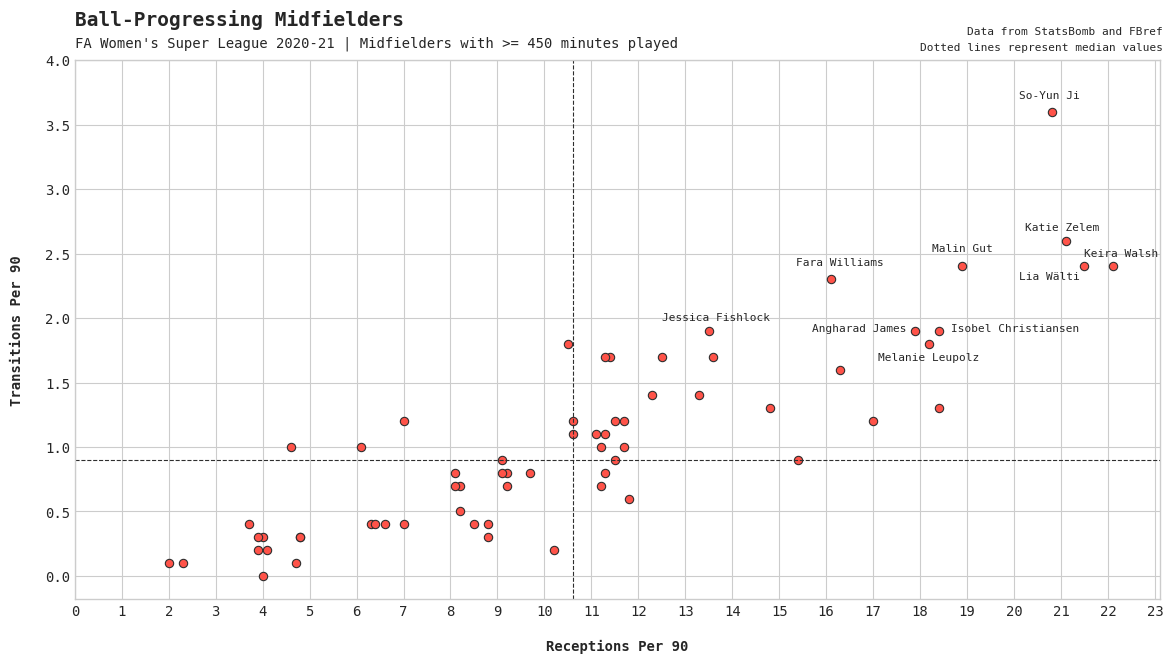

In [20]:
print('\n\n')

plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.scatter(
    x=results.receptions_per_90, 
    y=results.transitions_per_90, 
    c='#FF5349', 
    edgecolor='#2E2E2E', 
    linewidth=0.8
)

plt.title(
    label='Ball-Progressing Midfielders', 
    fontweight='bold', 
    family='monospace', 
    fontsize=14, 
    loc='left', 
    pad=25
)
plt.text(
    x=0, 
    y=4.1, 
    s="FA Women's Super League 2020-21 | Midfielders with >= 450 minutes played", 
    family='monospace', 
    fontsize=10
)
plt.text(
    x=19, 
    y=4.2, 
    s="Data from StatsBomb and FBref", 
    family='monospace', 
    fontsize=8
)
plt.text(
    x=18, 
    y=4.075, 
    s="Dotted lines represent median values", 
    family='monospace', 
    fontsize=8
)
plt.xticks(np.arange(0, 23 + 1, 1), family='monospace', fontsize=10)
plt.yticks(np.arange(0, 4.5, 0.5), family='monospace', fontsize=10)
plt.xlabel(
    'Receptions Per 90', 
    labelpad=15, 
    fontsize=10, 
    family='monospace', 
    fontweight='bold'
)
plt.ylabel(
    'Transitions Per 90', 
    labelpad=15, 
    fontsize=10, 
    family='monospace', 
    fontweight='bold'
)
plt.axhline(
    y=np.percentile(a=results.transitions_per_90, q=50), 
    color='#2E2E2E', 
    linestyle='--', 
    linewidth=0.8
)
plt.axvline(
    x=np.percentile(a=results.receptions_per_90, q=50), 
    color='#2E2E2E', 
    linestyle='--', 
    linewidth=0.8
)
plt.text(x=20.1, y=3.7, s="So-Yun Ji", family='monospace', fontsize=8)
plt.text(x=15.35, y=2.41, s="Fara Williams", family='monospace', fontsize=8)
plt.text(x=20.225, y=2.68, s="Katie Zelem", family='monospace', fontsize=8)
plt.text(x=20.1, y=2.3, s="Lia Wälti", family='monospace', fontsize=8)
plt.text(x=21.5, y=2.48, s="Keira Walsh", family='monospace', fontsize=8)
plt.text(x=18.25, y=2.52, s="Malin Gut", family='monospace', fontsize=8)
plt.text(x=17.1, y=1.67, s="Melanie Leupolz", family='monospace', fontsize=8)
plt.text(x=18.65, y=1.9, s="Isobel Christiansen", family='monospace', fontsize=8)
plt.text(x=12.5, y=1.98, s="Jessica Fishlock", family='monospace', fontsize=8)
plt.text(x=15.7, y=1.9, s="Angharad James", family='monospace', fontsize=8)
plt.show()

<br>
<br>

Few players stand out here: So-Yun Ji, Katie Zelem, Keira Walsh, Lia Wälti, Malin Gut, and Fara Williams. 

Ji played an instrumental role for Chelsea in their title-winning season where they won the FA WSL, FA Cup, League Cup, and FA Community Shield. They even finished second in the Champions League. 

In the [words](https://archive.ph/20210510141630/https://www.theguardian.com/football/2021/may/10/player-ratings-for-chelseas-wsl-title-winners#selection-1179.0-1179.224) of Suzanne Wrack of The Guardian after Chelsea's WSL title win:

> *Arguably the best foreign player in WSL history, Ji continues to be one of Chelsea’s most creative players. The South Korean twists her way out of the tightest gaps and has an eye for passes that few others would dare to try.*

The 7 times Korean FA Women's Player of the Year recorded a staggering 52 successful transitions (3.6 per 90), out of which 22 (1.5 per 90) were solo transitions (which we will discuss later in the analysis), in the 2020-21 WSL season.

Manchester United captain Katie Zelem recorded 37 transitions (2.6 per 90) in the 2020-21 WSL season, out of which an impressive 17 were solo transitions (1.2 per 90) which puts her right behind Ji.

Keira Walsh, Lia Wälti and Malin Gut follow next - with each one of them recording 2.4 successful transitions per 90. Keira comes second to Ji in total transitions - completing 47 transitions in the 2020-21 season. Malin, who was just 20 then, showed great promise by recording 18 successful transitions while playing for an average of only 42 minutes in the 16 matches she played that season. Malin's Arsenal teammate Lia completed 42 transitions in 2020-21.

England's highest capped footballer and one of the first inductees of the FA WSL Hall of Fame, Fara Williams hung up her boots at the end of the 2020-21 season with Reading. Even in her last season before retiring from football, she outshone other midfielders by recording 2.3 successful transitions per 90 which puts her above 92% of the midfielders analyzed.

<br>

<br>

---

## Impact of Playing Position and Team Playing Style

---

<br>

A question that might come to your mind is: 

**If Keira Walsh's receptions per 90 is around 6 more than that of Fara Williams, while both have similar transitions per 90 values (2.4 and 2.3, respectively), does it mean Fara is a better ball-progressing midfielder? In other words, is Keira not utilising those 6 additional receptions for transitioning the ball?**

Maybe, maybe not. Having a deeper look at her data can help us answer this question.

The first step is to check what's happening to those 6 extra receptions - why are they not reaching the attacking third? Let's see what happened to Fara's and Keira's receptions which didn't become successful transitions:

<br>

In [21]:
df = ball_receipts[(ball_receipts.player_id.isin([4658, 10251])) \
        & (ball_receipts.successful_transition == False)][
            [
                'id', 'player_id', 'player', 'transition_event_count', 
                'transition_players_involved', 'transition_final_location_x'
            ]
        ]

'''
* total minutes played by Fara = 1088

* total minutes played by Keira = 1776

* event_count_limit_reached -> sequence stopped because it involved 4 events already

* player_count_limit_reached -> sequence stopped because a third player got involved

* other_reasons -> sequence stopped due to defensive actions, stoppages in play or shots
'''

sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        ROUND(
            (
                COUNT(
                    CASE 
                        WHEN transition_event_count = 4 AND transition_players_involved < 3 THEN id 
                    END
                ) * 1.0 
                / 
                (CASE WHEN player_id = 4658 THEN 1776 ELSE 1088 END)
            ) * 90
            , 1
        ) AS event_count_limit_reached,
        ROUND(
            (
                COUNT(
                    CASE 
                        WHEN transition_event_count < 4 AND transition_players_involved = 3 THEN id 
                    END
                ) * 1.0 
                / 
                (CASE WHEN player_id = 4658 THEN 1776 ELSE 1088 END)
            ) * 90
            , 1
        ) AS player_count_limit_reached,
        ROUND(
            (
                COUNT(
                    CASE 
                        WHEN transition_event_count < 4 AND transition_players_involved < 3 THEN id 
                    END
                ) * 1.0 
                / 
                (CASE WHEN player_id = 4658 THEN 1776 ELSE 1088 END)
            ) * 90
            , 1
        ) AS other_reasons
    FROM df
    GROUP BY 1, 2
    '''
)

,player_id,player,event_count_limit_reached,player_count_limit_reached,other_reasons
0,4658,Keira Walsh,1.5,11.7,6.5
1,10251,Fara Williams,0.7,6.3,6.8


<br>

In the table above, it is evident that an excess of 5.4 receptions per 90 for Keira could not reach the attacking third compared to Fara due to the player count limit being reached. This addresses our question. To put it simply, out of those 6 extra receptions per 90 for Keira, nearly 5 couldn't make it to the attacking third because these sequences already involved more than 2 players before the completion of the transition.

Several reasons account for this observation. Firstly, Keira played almost all of her 20 matches that season as a defensive midfielder - which means a significant number of her receptions must have occurred even deeper (close to zones 1-3). That is, by the time the ball crosses the halfway line, it would often have gone through more than 2 players. In contrast, Fara played most of her games as a central midfielder.

<br>

In [22]:
print('\n\nKEIRA WALSH | FA WSL 2020-21 | POSITIONS PLAYED\n')

sqldf(
    '''
    SELECT 
        position,
        COUNT(DISTINCT match_id) AS number_of_matches
    FROM positional_data
    WHERE LOWER(player) LIKE '%keira walsh%'
    GROUP BY 1
    ORDER BY 2 DESC
    '''
)



KEIRA WALSH | FA WSL 2020-21 | POSITIONS PLAYED



,position,number_of_matches
0,Center Defensive Midfield,19
1,Right Center Midfield,1
2,Left Defensive Midfield,1


In [23]:
print('\n\nFARA WILLIAMS | FA WSL 2020-21 | POSITIONS PLAYED\n')

sqldf(
    '''
    SELECT 
        position,
        COUNT(DISTINCT match_id) AS number_of_matches
    FROM positional_data
    WHERE LOWER(player) LIKE '%fara williams%'
    GROUP BY 1
    ORDER BY 2 DESC
    '''
)



FARA WILLIAMS | FA WSL 2020-21 | POSITIONS PLAYED



,position,number_of_matches
0,Left Center Midfield,4
1,Left Midfield,3
2,Center Defensive Midfield,3
3,Right Center Midfield,2
4,Left Center Forward,2
5,Center Attacking Midfield,2
6,Right Center Forward,1
7,Right Back,1
8,Left Defensive Midfield,1


<br>

When examining the start and end x-coordinates of Keira's sequences, which couldn't become successful transitions due to the player limit being reached, we observe that the median start location is at 42.1 and the median end location is at 40.6. This implies that these sequences of Keira were more or less played laterally around the border of the defensive third and the middle third of the pitch.

<br>

In [24]:
df = ball_receipts[
                (ball_receipts.player_id == 10251) \
                & (ball_receipts.successful_transition == False) \
                & (ball_receipts.transition_event_count < 4) \
                & (ball_receipts.transition_players_involved == 3)
            ]

median_start_location_x = df.location.apply(lambda x: x[0]).median()

median_end_location_x = df.transition_final_location_x.median()

print('\n\nKEIRA WALSH | UNSUCCESSFUL TRANSITIONS DUE TO PLAYER COUNT LIMIT REACHED\n')
print('Median sequence start location (x-coordinate) =', round(median_start_location_x, 1))
print('Median sequence end location (x-coordinate) =', round(median_end_location_x, 1))



KEIRA WALSH | UNSUCCESSFUL TRANSITIONS DUE TO PLAYER COUNT LIMIT REACHED

Median sequence start location (x-coordinate) = 42.1
Median sequence end location (x-coordinate) = 40.6


<br>

To support this observation, I utilised the ball_receipts dataframe to find multiple clips. [Here](https://youtu.be/-vHPbbJFMvY?si=11wYK3q2sSGop2tW&t=2682) is one of them. In this clip, Keira (# 24) receives the ball a couple of times in her defensive half at 33:31 and 33:40. After watching a few clips, I realised Manchester City likes to build up from the back - circulating the ball through short passes, involving the defenders and the goalkeeper. Hence, Keira can also be seen playing the ball back quite often when she's in her own half. However, when she's in zones 10-12, she is not shy of making those dangerous carries and passes into the attacking third (see 33:40 and 34:06).

So, is Keira less effective as a ball-progressing midfielder? Is Keira not utilising the extra receptions? I would say that's not true. It's Keira's playing position and her team's style of play that require her to be involved in those extra sequences that don't end up as successful transitions. Despite this, Keira's 2.4 transitions per 90 put her above 96% of the midfielders analyzed. This makes her a great prospect for any team looking for a ball-progressing midfielder - whether they build up from the back like City or they have a more direct style of play.

<br>

<br>

---

## The Solo Stars

---

<br>

Now, let's delve into the solo transitions data. 

**Solo transitions are those sequences where the midfielder receiving the pass single-handedly (or, shall I say, single-footedly?) transitions the ball to the attacking third through a pass, a carry, or a combination of both.** 

Players capable of such individual contributions can significantly influence a team's potential to score more goals and win games.

*(Players showcased here have a solo_transitions value and a solo_transitions_per_90 value equal to or greater than the respective medians. They are arranged first by total solo transitions and then by solo transitions per 90):*

<br>

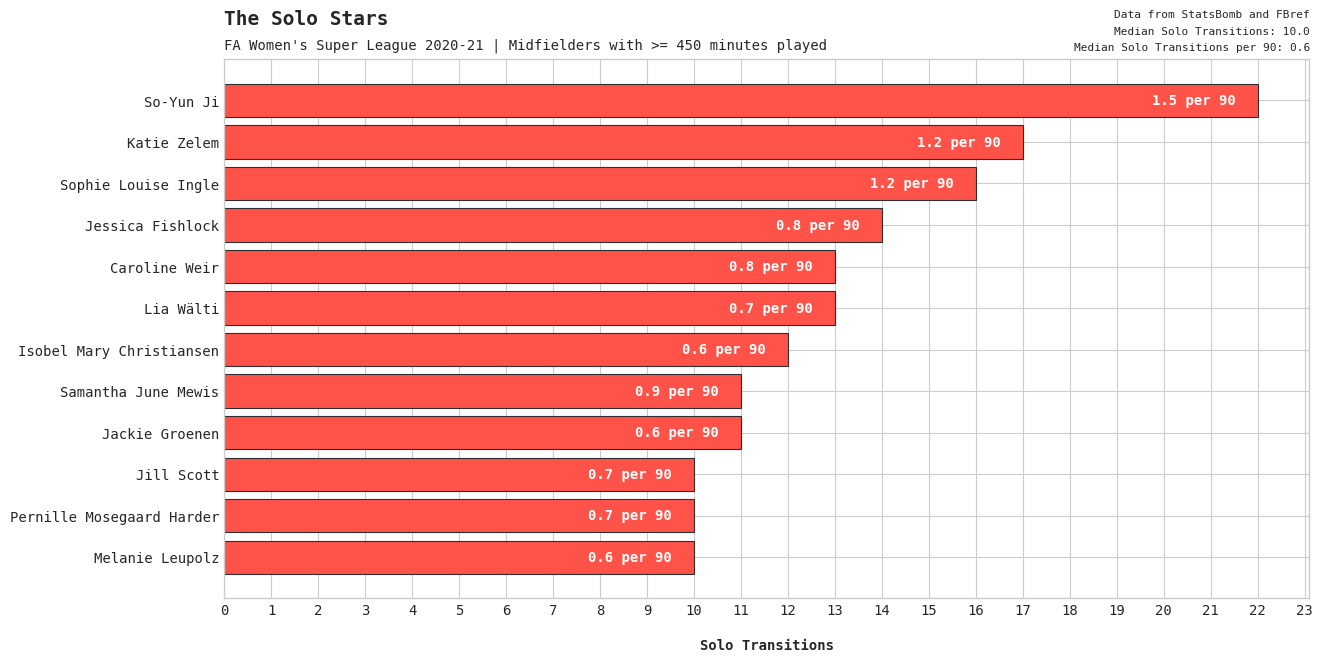

In [25]:
solo_stars = sqldf(
    '''
    SELECT 
        player_id,
        player,
        solo_transitions,
        solo_transitions_per_90
    FROM results
    WHERE solo_transitions >= 10
        AND solo_transitions_per_90 >= 0.6
    ORDER BY 3 DESC, 4 DESC, 1
    '''
).sort_values(['solo_transitions', 'solo_transitions_per_90'])

print('\n\n')

plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.barh(
    solo_stars.player, 
    solo_stars.solo_transitions, 
    color='#FF5349', 
    edgecolor='#2E2E2E', 
    linewidth=0.8
)
plt.title(
    label='The Solo Stars', 
    fontweight='bold', 
    family='monospace', 
    fontsize=14, 
    loc='left', 
    pad=25
)
plt.text(
    x=0, 
    y=12.25, 
    s="FA Women's Super League 2020-21 | Midfielders with >= 450 minutes played", 
    family='monospace', 
    fontsize=10
)
plt.text(
    x=18.95, 
    y=13, 
    s="Data from StatsBomb and FBref", 
    family='monospace', 
    fontsize=8
)
plt.text(
    x=18.95, 
    y=12.6, 
    s=f"Median Solo Transitions: {np.percentile(solo_stars.solo_transitions, 0.5)}", 
    family='monospace', 
    fontsize=8
)
plt.text(
    x=18.1, 
    y=12.2, 
    s=f"Median Solo Transitions per 90: {np.percentile(solo_stars.solo_transitions_per_90, 0.5)}", 
    family='monospace', 
    fontsize=8
)
plt.xticks(np.arange(0, 23 + 1, 1), family='monospace', fontsize=10)
plt.yticks( family='monospace', fontsize=10)
plt.xlabel(
    'Solo Transitions', 
    labelpad=15, 
    fontsize=10, 
    family='monospace', 
    fontweight='bold'
)
plt.text(x=19.75, y=10.9, s="1.5 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=14.75, y=9.9, s="1.2 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=13.75, y=8.9, s="1.2 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=11.75, y=7.9, s="0.8 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=10.75, y=6.9, s="0.8 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=10.75, y=5.9, s="0.7 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=9.75, y=4.9, s="0.6 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=8.75, y=3.9, s="0.9 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=8.75, y=2.9, s="0.6 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=7.75, y=1.9, s="0.7 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=7.75, y=0.9, s="0.7 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=7.75, y=-0.1, s="0.6 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.show()

<br>
<br>

As mentioned earlier, So-Yun Ji made an astounding 22 solo transitions (1.5 per 90) in the 2020-21 WSL season. She was followed by Katie Zelem who made 17 solo transitions (1.2 per 90). Ji's Chelsea teammate Sophie Ingle is third on the list with 16 solo transitions (1.2 per 90).

<br>

<br>

---

## Video Samples

---

<br>

Let's also have a look at some match clips of So-Yun Ji to understand how impactful these transitions are. I used the ball_receipts dataframe to find these instances:

1. [This clip](https://youtu.be/VZwPClTUEag?si=IIGQ7KwPfkZGQ_5I&t=4262) perfectly summarises the essence of this analysis. Remember Suzanne Wrack's words on how Ji 'has an eye for passes that few others would dare to try'? She was talking about this. If someone is hesitant to read the entire analysis, then just watching this clip will suffice. In this solo transition, Ji (# 10) chests down a throw pass from her goalkeeper (while being under pressure from three opponents), turns around, and makes a volleyed line-breaking pass to Fran Kirby (# 14). Fran then makes a one-touch low cross to Sam Kerr (# 20) who converts it into a goal. All in all, Ji got a pre-assist, Fran got an assist, and Sam scored an important goal for the team - all of this in just 7 seconds. The best part is Ji already knew what she would do once she got the pass. An absolute genius!
>
2. Observe [this possession clip](https://youtu.be/K6AZekdTNcI?si=c9NllsWTUBMWNvKB&t=3247). At 45:04, you can see Ji (# 10) communicating with her right back Maren Mjelde (# 18) - possibly Ji asking her to move up on the wing for a potential pass. Starting at 45:08, you can see Ji dropping slightly to receive the ball while simultaneously checking her shoulder multiple times for impending pressure and available carry/pass options - a crucial skill among top-class players. At 45:13, Ji passes the ball to Maren, who quickly runs into zone 14, a highly valuable area for attacks, completing the transition.
>
3. In [this clip](https://youtu.be/VZwPClTUEag?si=NHSqCvE2wg2xDbwc&t=4167), observe Ji (# 10) confidently asking for the ball at 54:59 while simultaneously checking her shoulders for approaching opponents. She then carries the ball and makes a pass into the attacking third (left wing).

<br>

<br>

---

## Conclusion

---

<br>

I hope these clips have effectively highlighted the key message of this analysis. A midfielder's ability to drop into her defensive half, receive a pass, and transition the ball into the attacking third can significantly enhance her team's prospects of scoring more goals and winning games. As previously observed, the top 5 players in terms of transitions per 90 played for the top 4 teams of the FA WSL 2020-21 season - So-Yun played for Chelsea, Walsh played for Manchester City, Wälti and Gut played for Arsenal, and Zelem played for Manchester United.

<br>

This analysis can also serve as a foundation for various applications:
- Player recruitment
- Opponent analysis
- Identification of the two players most frequently combining to create attacking opportunities within a team
- Examination of the playing style of players or teams, evaluating their preferred methods of transitioning the ball, such as through long balls, a combination of quick short passes, or via the wings.
- Integration with tracking data could allow us to quantify the effort made by these midfielders in dropping back and receiving the ball. This could involve metrics like the distance moved or the reduction in pressure from their starting position to where they move to receive the ball, as these players aim to find open spaces for both effective passing and receiving.
- Conducting a similar analysis for different pitch configurations, such as the ['5 lanes - 2 half spaces' configuration](https://www.coachesvoice.com/cv/half-spaces-football-tactics-explained/).

<br>

I eagerly look forward to your feedback on how to improve this analysis further. Please share your thoughts, suggestions, or advice on [X](https://twitter.com/PrateekSenapati), [LinkedIn](https://www.linkedin.com/in/prateek-senapati/), or via email at <prateek1210s@gmail.com>.

<br>

<br>
<br>